In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#yassin talssis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/players-data/data.csv


In [39]:
#exercices=['Dribbling', 'Free Kicks', 'Passing Drills','Shooting Practice', 'Strength Training','Agility Drills', 'Ball Control', 'Trick Shots', 'Defensive Drills', 'Heading Practice','Passing Accuracy', 
#'Vision Training','Defensive Positioning', 'Long Passing', 'Sprint Training', 'Agility Drills', 'Midfield Control', 'Short Passing', 'Finishing Drills', 'Shooting Accuracy','Defensive Positioning', 'Tackling Practice']

#  The dataset building

In [4]:
import pandas as pd

# Your list of player dictionaries
players = [
    {
        "Player_Name": "Hakim Ziyech",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.7,
        "Speed": 20,
        "Distance": 4.2,
        "Height": 180,
        "Age": 29,
        "Weight": 70,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Achraf Hakimi",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 148,
        "Body_Temperature": 98.4,
        "Speed": 25,
        "Distance": 4.8,
        "Height": 182,
        "Age": 22,
        "Weight": 73,
        "Recommended_Exercises": ["Sprint Training", "Crossing Practice"]
    },
    {
        "Player_Name": "Youssef En-Nesyri",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Finisher",
        "Heart_Rate": 155,
        "Body_Temperature": 98.6,
        "Speed": 23,
        "Distance": 4.5,
        "Height": 186,
        "Age": 24,
        "Weight": 76,
        "Recommended_Exercises": ["Finishing Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Romain Saïss",
        "Position": "Defender",
        "Preferred_Foot": "Left",
        "Playing_Style": "Physical",
        "Heart_Rate": 138,
        "Body_Temperature": 98.9,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 190,
        "Age": 30,
        "Weight": 80,
        "Recommended_Exercises": ["Defensive Positioning", "Heading Practice"]
    },
    {
        "Player_Name": "Achraf Bencharki",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Speedster",
        "Heart_Rate": 165,
        "Body_Temperature": 98.7,
        "Speed": 24,
        "Distance": 5.2,
        "Height": 176,
        "Age": 27,
        "Weight": 72,
        "Recommended_Exercises": ["Sprint Training", "Agility Drills"]
    },
    {
        "Player_Name": "Younès Belhanda",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.6,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 174,
        "Age": 31,
        "Weight": 70,
        "Recommended_Exercises": ["Midfield Control", "Short Passing"]
    },
    {
        "Player_Name": "Hamza Mendyl",
        "Position": "Defender",
        "Preferred_Foot": "Left",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 150,
        "Body_Temperature": 98.3,
        "Speed": 22,
        "Distance": 4.0,
        "Height": 182,
        "Age": 25,
        "Weight": 75,
        "Recommended_Exercises": ["Crossing Practice", "Agility Drills"]
    },
    {
        "Player_Name": "Achraf Dari",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 138,
        "Body_Temperature": 98.6,
        "Speed": 18,
        "Distance": 3.5,
        "Height": 184,
        "Age": 29,
        "Weight": 76,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Fayçal Fajr",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 143,
        "Body_Temperature": 98.4,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 176,
        "Age": 32,
        "Weight": 72,
        "Recommended_Exercises": ["Passing Drills", "Vision Training"]
    },
    {
        "Player_Name": "Nordin Amrabat",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Speedster",
        "Heart_Rate": 155,
        "Body_Temperature": 98.7,
        "Speed": 22,
        "Distance": 4.3,
        "Height": 179,
        "Age": 34,
        "Weight": 78,
        "Recommended_Exercises": ["Sprint Training", "Dribbling"]
    },
    {
        "Player_Name": "Jawad El Yamiq",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 140,
        "Body_Temperature": 98.8,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 188,
        "Age": 29,
        "Weight": 82,
        "Recommended_Exercises": ["Defensive Positioning", "Tackling Practice"]
    },
    {
        "Player_Name": "Hicham Mahou",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.5,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 175,
        "Age": 28,
        "Weight": 70,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Amine Bassi",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 138,
        "Body_Temperature": 98.7,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 178,
        "Age": 26,
        "Weight": 75,
        "Recommended_Exercises": ["Midfield Control", "Short Passing"]
    },
    {
        "Player_Name": "Badr Benoun",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 140,
        "Body_Temperature": 98.6,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 185,
        "Age": 28,
        "Weight": 80,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Oussama Tannane",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 143,
        "Body_Temperature": 98.6,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 173,
        "Age": 28,
        "Weight": 68,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Youssef Aït Bennasser",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Ball-Winner",
        "Heart_Rate": 135,
        "Body_Temperature": 98.4,
        "Speed": 17,
        "Distance": 3.5,
        "Height": 181,
        "Age": 25,
        "Weight": 73,
        "Recommended_Exercises": ["Defensive Positioning", "Tackling Practice"]
    },
    {
        "Player_Name": "Adel Taarabt",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 138,
        "Body_Temperature": 98.6,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 176,
        "Age": 32,
        "Weight": 74,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Khalid Boutaïb",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Finisher",
        "Heart_Rate": 150,
        "Body_Temperature": 98.7,
        "Speed": 21,
        "Distance": 4.0,
        "Height": 185,
        "Age": 34,
        "Weight": 80,
        "Recommended_Exercises": ["Finishing Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Zouhair Feddal",
        "Position": "Defender",
        "Preferred_Foot": "Left",
        "Playing_Style": "Physical",
        "Heart_Rate": 138,
        "Body_Temperature": 98.5,
        "Speed": 20,
        "Distance": 4.2,
        "Height": 186,
        "Age": 32,
        "Weight": 82,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Noussair Mazraoui",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 145,
        "Body_Temperature": 98.4,
        "Speed": 24,
        "Distance": 4.5,
        "Height": 177,
        "Age": 24,
        "Weight": 71,
        "Recommended_Exercises": ["Sprint Training", "Crossing Practice"]
    },
    {
        "Player_Name": "Karim El Ahmadi",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.6,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 175,
        "Age": 37,
        "Weight": 72,
        "Recommended_Exercises": ["Midfield Control", "Short Passing"]
    },
 
    {
        "Player_Name": "Abdeljalil Jbira",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Ball-Winner",
        "Heart_Rate": 135,
        "Body_Temperature": 98.5,
        "Speed": 18,
        "Distance": 3.8,
        "Height": 179,
        "Age": 30,
        "Weight": 75,
        "Recommended_Exercises": ["Defensive Positioning", "Tackling Practice"]
    },
    {
        "Player_Name": "Ayoub El Kaabi",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Finisher",
        "Heart_Rate": 150,
        "Body_Temperature": 98.7,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 181,
        "Age": 27,
        "Weight": 77,
        "Recommended_Exercises": ["Finishing Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Younès Belhanda",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.5,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 174,
        "Age": 31,
        "Weight": 70,
        "Recommended_Exercises": ["Midfield Control", "Short Passing"]
    },
    {
        "Player_Name": "Hamza Mendyl",
        "Position": "Defender",
        "Preferred_Foot": "Left",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 150,
        "Body_Temperature": 98.3,
        "Speed": 22,
        "Distance": 4.0,
        "Height": 182,
        "Age": 25,
        "Weight": 75,
        "Recommended_Exercises": ["Crossing Practice", "Agility Drills"]
    },
    {
        "Player_Name": "Sofyan Amrabat",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Ball-Winner",
        "Heart_Rate": 137,
        "Body_Temperature": 98.4,
        "Speed": 18,
        "Distance": 3.5,
        "Height": 184,
        "Age": 25,
        "Weight": 74,
        "Recommended_Exercises": ["Defensive Positioning", "Tackling Practice"]
    },
    {
        "Player_Name": "Zakaria Labyad",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.6,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 177,
        "Age": 28,
        "Weight": 71,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Sofiane Boufal",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 138,
        "Body_Temperature": 98.5,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 174,
        "Age": 28,
        "Weight": 70,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Walid Azarou",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Finisher",
        "Heart_Rate": 152,
        "Body_Temperature": 98.7,
        "Speed": 23,
        "Distance": 4.5,
        "Height": 182,
        "Age": 29,
        "Weight": 75,
        "Recommended_Exercises": ["Finishing Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Marouane Da Costa",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 140,
        "Body_Temperature": 98.6,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 186,
        "Age": 33,
        "Weight": 82,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Sofiane Alakouch",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 145,
        "Body_Temperature": 98.5,
        "Speed": 24,
        "Distance": 4.5,
        "Height": 179,
        "Age": 23,
        "Weight": 73,
        "Recommended_Exercises": ["Sprint Training", "Crossing Practice"]
    },
    {
        "Player_Name": "Zakaria Aboukhlal",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Speedster",
        "Heart_Rate": 160,
        "Body_Temperature": 98.7,
        "Speed": 25,
        "Distance": 5.2,
        "Height": 176,
        "Age": 21,
        "Weight": 68,
        "Recommended_Exercises": ["Sprint Training", "Agility Drills"]
    },
    {
        "Player_Name": "Ahmed Reda Tagnaouti",
        "Position": "Goalkeeper",
        "Preferred_Foot": "Right",
        "Playing_Style": "Shot-Stopper",
        "Heart_Rate": 120,
        "Body_Temperature": 98.0,
        "Speed": 15,
        "Distance": 3.0,
        "Height": 185,
        "Age": 25,
        "Weight": 82,
        "Recommended_Exercises": ["Reaction Drills", "Goalkeeper Training"]
    },
    {
        "Player_Name": "Soufyan Ahannach",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 140,
        "Body_Temperature": 98.4,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 173,
        "Age": 26,
        "Weight": 71,
        "Recommended_Exercises": ["Passing Drills", "Vision Training"]
    },
    {
        "Player_Name": "Achraf Dari",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 138,
        "Body_Temperature": 98.6,
        "Speed": 18,
        "Distance": 3.5,
        "Height": 184,
        "Age": 29,
        "Weight": 76,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Fayçal Fajr",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 143,
        "Body_Temperature": 98.4,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 176,
        "Age": 32,
        "Weight": 72,
        "Recommended_Exercises": ["Passing Drills", "Vision Training"]
    },
    {
        "Player_Name": "Nordin Amrabat",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Speedster",
        "Heart_Rate": 155,
        "Body_Temperature": 98.7,
        "Speed": 22,
        "Distance": 4.3,
        "Height": 179,
        "Age": 34,
        "Weight": 78,
        "Recommended_Exercises": ["Sprint Training", "Dribbling"]
    },
    {
        "Player_Name": "Jawad El Yamiq",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 140,
        "Body_Temperature": 98.8,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 188,
        "Age": 29,
        "Weight": 82,
        "Recommended_Exercises": ["Defensive Positioning", "Tackling Practice"]
    },
    {
        "Player_Name": "Hicham Mahou",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.5,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 175,
        "Age": 28,
        "Weight": 70,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Amine Bassi",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 138,
        "Body_Temperature": 98.7,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 178,
        "Age": 26,
        "Weight": 75,
        "Recommended_Exercises": ["Midfield Control", "Short Passing"]
    },
    {
        "Player_Name": "Badr Benoun",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 140,
        "Body_Temperature": 98.6,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 185,
        "Age": 28,
        "Weight": 80,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Achraf Hakimi",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 145,
        "Body_Temperature": 98.5,
        "Speed": 23,
        "Distance": 4.5,
        "Height": 181,
        "Age": 23,
        "Weight": 74,
        "Recommended_Exercises": ["Sprint Training", "Crossing Practice"]
    },
    {
        "Player_Name": "Oussama Tannane",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 143,
        "Body_Temperature": 98.6,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 173,
        "Age": 28,
        "Weight": 68,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Youssef Aït Bennasser",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Ball-Winner",
        "Heart_Rate": 135,
        "Body_Temperature": 98.4,
        "Speed": 17,
        "Distance": 3.5,
        "Height": 181,
        "Age": 25,
        "Weight": 73,
        "Recommended_Exercises": ["Defensive Positioning", "Tackling Practice"]
    },
    {
        "Player_Name": "Adel Taarabt",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 138,
        "Body_Temperature": 98.6,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 176,
        "Age": 32,
        "Weight": 74,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Khalid Boutaïb",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Finisher",
        "Heart_Rate": 150,
        "Body_Temperature": 98.7,
        "Speed": 21,
        "Distance": 4.0,
        "Height": 185,
        "Age": 34,
        "Weight": 80,
        "Recommended_Exercises": ["Finishing Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Zouhair Feddal",
        "Position": "Defender",
        "Preferred_Foot": "Left",
        "Playing_Style": "Physical",
        "Heart_Rate": 138,
        "Body_Temperature": 98.5,
        "Speed": 20,
        "Distance": 4.2,
        "Height": 186,
        "Age": 32,
        "Weight": 82,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Noussair Mazraoui",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 145,
        "Body_Temperature": 98.4,
        "Speed": 24,
        "Distance": 4.5,
        "Height": 177,
        "Age": 24,
        "Weight": 71,
        "Recommended_Exercises": ["Sprint Training", "Crossing Practice"]
    },
    {
        "Player_Name": "Karim El Ahmadi",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.6,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 175,
        "Age": 37,
        "Weight": 72,
        "Recommended_Exercises": ["Midfield Control", "Short Passing"]
    },
    {
        "Player_Name": "Achraf Bencharki",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Speedster",
        "Heart_Rate": 160,
        "Body_Temperature": 98.7,
        "Speed": 25,
        "Distance": 5.2,
        "Height": 174,
        "Age": 29,
        "Weight": 71,
        "Recommended_Exercises": ["Sprint Training", "Agility Drills"]
    },
    {
        "Player_Name": "Ayoub El Kaabi",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Finisher",
        "Heart_Rate": 150,
        "Body_Temperature": 98.7,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 181,
        "Age": 27,
        "Weight": 77,
        "Recommended_Exercises": ["Finishing Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Younès Belhanda",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.5,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 174,
        "Age": 31,
        "Weight": 70,
        "Recommended_Exercises": ["Midfield Control", "Short Passing"]
    },
    {
        "Player_Name": "Hamza Mendyl",
        "Position": "Defender",
        "Preferred_Foot": "Left",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 150,
        "Body_Temperature": 98.3,
        "Speed": 22,
        "Distance": 4.0,
        "Height": 182,
        "Age": 25,
        "Weight": 75,
        "Recommended_Exercises": ["Crossing Practice", "Agility Drills"]
    },
    {
        "Player_Name": "Sofyan Amrabat",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Ball-Winner",
        "Heart_Rate": 137,
        "Body_Temperature": 98.4,
        "Speed": 18,
        "Distance": 3.5,
        "Height": 184,
        "Age": 25,
        "Weight": 74,
        "Recommended_Exercises": ["Defensive Positioning", "Tackling Practice"]
    },
    {
        "Player_Name": "Zakaria Labyad",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 142,
        "Body_Temperature": 98.6,
        "Speed": 21,
        "Distance": 4.2,
        "Height": 177,
        "Age": 28,
        "Weight": 71,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Sofiane Boufal",
        "Position": "Midfielder",
        "Preferred_Foot": "Left",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 138,
        "Body_Temperature": 98.5,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 174,
        "Age": 28,
        "Weight": 70,
        "Recommended_Exercises": ["Passing Accuracy", "Vision Training"]
    },
    {
        "Player_Name": "Walid Azarou",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Finisher",
        "Heart_Rate": 152,
        "Body_Temperature": 98.7,
        "Speed": 23,
        "Distance": 4.5,
        "Height": 182,
        "Age": 29,
        "Weight": 75,
        "Recommended_Exercises": ["Finishing Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Marouane Da Costa",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 140,
        "Body_Temperature": 98.6,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 186,
        "Age": 33,
        "Weight": 82,
        "Recommended_Exercises": ["Defensive Drills", "Heading Practice"]
    },
    {
        "Player_Name": "Sofiane Alakouch",
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Attack-Minded",
        "Heart_Rate": 145,
        "Body_Temperature": 98.5,
        "Speed": 24,
        "Distance": 4.5,
        "Height": 179,
        "Age": 23,
        "Weight": 73,
        "Recommended_Exercises": ["Sprint Training", "Crossing Practice"]
    },
    {
        "Player_Name": "Zakaria Aboukhlal",
        "Position": "Forward",
        "Preferred_Foot": "Right",
        "Playing_Style": "Speedster",
        "Heart_Rate": 160,
        "Body_Temperature": 98.7,
        "Speed": 25,
        "Distance": 5.2,
        "Height": 176,
        "Age": 21,
        "Weight": 68,
        "Recommended_Exercises": ["Sprint Training", "Agility Drills"]
    },
    {
        "Player_Name": "Ahmed Reda Tagnaouti",
        "Position": "Goalkeeper",
        "Preferred_Foot": "Right",
        "Playing_Style": "Shot-Stopper",
        "Heart_Rate": 120,
        "Body_Temperature": 98.0,
        "Speed": 15,
        "Distance": 3.0,
        "Height": 185,
        "Age": 25,
        "Weight": 82,
        "Recommended_Exercises": ["Reaction Drills", "Goalkeeper Training"]
    },
    {
        "Player_Name": "Soufyan Ahannach",
        "Position": "Midfielder",
        "Preferred_Foot": "Right",
        "Playing_Style": "Playmaker",
        "Heart_Rate": 140,
        "Body_Temperature": 98.4,
        "Speed": 20,
        "Distance": 4.0,
        "Height": 173,
        "Age": 26,
        "Weight": 71,
        "Recommended_Exercises": ["Passing Drills", "Vision Training"]
    },
]

# Define recommended exercises based on playing roles
role_exercises = {
    "Midfielder": [
        "Passing Accuracy",
        "Vision Training",
        "Midfield Control",
        "Short Passing",
        "Reaction Drills",
        "Defensive Positioning",
        "Crossing Practice",
        "Agility Drills",
        "Free Kick Practice",
        "Attacking Movement"
    ],
    "Defender": [
        "Defensive Drills",
        "Heading Practice",
        "Defensive Positioning",
        "Tackling Practice",
        "Agility Drills",
        "Ball Control Drills",
        "One-on-One Defending",
        "Pace Training",
        "Aerial Duel Practice",
        "Positioning Drills"
    ],
    "Forward": [
        "Finishing Drills",
        "Heading Practice",
        "Sprint Training",
        "Dribbling",
        "Agility Drills",
        "Attacking Movement",
        "Crossing Practice",
        "Ball Control Drills",
        "Shooting Accuracy",
        "Free Kick Practice"
    ],
    "Goalkeeper": [
        "Reaction Drills",
        "Goalkeeper Training",
        "One-on-One Defending",
        "Positioning Drills",
        "Aerial Duel Practice"
    ]
}


# Expand the player data with recommended exercises

for player in players:
    role = player["Position"]
    if role in role_exercises:
        recommended_exercises = set(player.get("Recommended_Exercises", []))
        new_exercises = [exercise for exercise in role_exercises[role] if exercise not in recommended_exercises]
        player.setdefault("Recommended_Exercises", []).extend(new_exercises)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(players)

# Display the DataFrame
df


,Player_Name,Position,Preferred_Foot,Playing_Style,Heart_Rate,Body_Temperature,Speed,Distance,Height,Age,Weight,Recommended_Exercises
0,Hakim Ziyech,Midfielder,Left,Playmaker,142,98.7,20,4.2,180,29,70,"[Passing Accuracy, Vision Training, Midfield C..."
1,Achraf Hakimi,Defender,Right,Attack-Minded,148,98.4,25,4.8,182,22,73,"[Sprint Training, Crossing Practice, Defensive..."
2,Youssef En-Nesyri,Forward,Right,Finisher,155,98.6,23,4.5,186,24,76,"[Finishing Drills, Heading Practice, Sprint Tr..."
3,Romain Saïss,Defender,Left,Physical,138,98.9,19,3.8,190,30,80,"[Defensive Positioning, Heading Practice, Defe..."
4,Achraf Bencharki,Forward,Right,Speedster,165,98.7,24,5.2,176,27,72,"[Sprint Training, Agility Drills, Finishing Dr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
57,Marouane Da Costa,Defender,Right,Physical,140,98.6,19,3.8,186,33,82,"[Defensive Drills, Heading Practice, Defensive..."
58,Sofiane Alakouch,Defender,Right,Attack-Minded,145,98.5,24,4.5,179,23,73,"[Sprint Training, Crossing Practice, Defensive..."
59,Zakaria Aboukhlal,Forward,Right,Speedster,160,98.7,25,5.2,176,21,68,"[Sprint Training, Agility Drills, Finishing Dr..."
60,Ahmed Reda Tagnaouti,Goalkeeper,Right,Shot-Stopper,120,98.0,15,3.0,185,25,82,"[Reaction Drills, Goalkeeper Training, One-on-..."


In [5]:
import random

positions = ["Goalkeeper", "Defender", "Midfielder", "Forward"]
preferred_feet = ["Left", "Right"]
playing_styles = ["Playmaker", "Attack-Minded", "Finisher", "Physical", "Speedster"]

# Generate random player data
def generate_player():
    player = {
        "Player_Name": "Player " + str(random.randint(101, 999)),
        "Position": random.choice(positions),
        "Preferred_Foot": random.choice(preferred_feet),
        "Playing_Style": random.choice(playing_styles),
        "Heart_Rate": random.randint(130, 180),
        "Body_Temperature": round(random.uniform(98.0, 99.0), 1),
        "Speed": random.randint(18, 26),
        "Distance": round(random.uniform(3.5, 5.5), 1),
        "Height": random.randint(170, 200),
        "Age": random.randint(18, 35),
        "Weight": random.randint(60, 90),
        "Recommended_Exercises": random.sample(["Passing Accuracy", "Vision Training", "Sprint Training", "Crossing Practice", "Finishing Drills", "Heading Practice", "Defensive Positioning", "Agility Drills", "Strength Training"], 2)
    }
    return player

# Generate 40 players and add them to the list
for _ in range(100):
    players.append(generate_player())



In [6]:
#this code for step 2

def recommend_exercises(player_data):
    position = player_data["Position"]
    recommended_exercises = []

    # Adjust based on weight
    if player_data["Weight"] > 80:
        recommended_exercises.append("Strength Training")
        recommended_exercises.append("Functional Strength Workouts")
        recommended_exercises.append("Agility Drills with Resistance")
    else:
        recommended_exercises.append("Agility Drills")
        recommended_exercises.append("Plyometric Exercises")
        recommended_exercises.append("Speed Ladder Drills")

    # Adjust based on age
    if player_data["Age"] < 25:
        recommended_exercises.append("Youth Conditioning Drills")
        recommended_exercises.append("Dynamic Stretching")
        recommended_exercises.append("Balancing Exercises")

    # Adjust based on speed and distance
    if player_data["Speed"] > 18:
        recommended_exercises.append("Speed and Acceleration Training")
        recommended_exercises.append("Sprint Intervals")
        recommended_exercises.append("Cone Drills")

    if player_data["Distance"] > 4:
        recommended_exercises.append("Endurance Training")
        recommended_exercises.append("Interval Runs")
        recommended_exercises.append("Agility Circuit Training")

    # Adjust based on height
    if player_data["Height"] > 185:
        recommended_exercises.append("Aerial Duel Practice")
        recommended_exercises.append("Jumping Exercises")
        recommended_exercises.append("Heading Drills")

    return recommended_exercises
# Define the recommended exercises for each position

    
for player in players:
    role = player["Position"]
    recommended_exercisess = set(player.get("Recommended_Exercises", []))
    new_exercises = [exercise for exercise in recommend_exercises(player) if exercise not in recommended_exercisess]
    player.setdefault("Recommended_Exercises", []).extend(new_exercises)
# Print the updated player data


In [ ]:
df = pd.DataFrame(players)
df.drop_duplicates(subset='Player_Name', inplace=True)
df.to_csv("data.csv", index=False)

In [7]:

exercise_encoding = {
    "Sprint Training": 0,
    "Dribbling": 1,
    "Passing Drills": 2,
    "Vision Training": 3,
}

# Extract unique exercises from the array and add them to exercise_encoding
for exercises_list in df['Recommended_Exercises'].values:
    for exercise in exercises_list:
        if exercise not in exercise_encoding:
            next_index = max(exercise_encoding.values()) + 1
            exercise_encoding[exercise] = next_index

# Print the updated exercise_encoding dictionary
print("Updated exercise_encoding:")
print(exercise_encoding)

Updated exercise_encoding:
{'Sprint Training': 0, 'Dribbling': 1, 'Passing Drills': 2, 'Vision Training': 3, 'Passing Accuracy': 4, 'Midfield Control': 5, 'Short Passing': 6, 'Reaction Drills': 7, 'Defensive Positioning': 8, 'Crossing Practice': 9, 'Agility Drills': 10, 'Free Kick Practice': 11, 'Attacking Movement': 12, 'Plyometric Exercises': 13, 'Speed Ladder Drills': 14, 'Speed and Acceleration Training': 15, 'Sprint Intervals': 16, 'Cone Drills': 17, 'Endurance Training': 18, 'Interval Runs': 19, 'Agility Circuit Training': 20, 'Defensive Drills': 21, 'Heading Practice': 22, 'Tackling Practice': 23, 'Ball Control Drills': 24, 'One-on-One Defending': 25, 'Pace Training': 26, 'Aerial Duel Practice': 27, 'Positioning Drills': 28, 'Youth Conditioning Drills': 29, 'Dynamic Stretching': 30, 'Balancing Exercises': 31, 'Finishing Drills': 32, 'Shooting Accuracy': 33, 'Jumping Exercises': 34, 'Heading Drills': 35, 'Strength Training': 36, 'Functional Strength Workouts': 37, 'Agility Drills

In [10]:
playing_style_encoding = {
    "Speedster": 1,
    "Playmaker": 2,
    "Physical": 3,
    "Finisher": 4,
    "Ball-Winner": 5,
    "Target Man": 6,
    "Trequartista": 7,
    "Wide Midfielder": 8,
    "Defensive Midfielder": 9,
    "Regista": 10,
    "Box-to-Box": 11,
    "Deep-Lying Playmaker": 12,
    "Libero": 13,
    "Wing-Back": 14,
    "Sweeper": 15,
    "No-Nonsense Defender": 16,
    "Central Defender": 17,
    "Full-Back": 18,
    "Winger": 19,
    "False Nine": 20,
    "Shadow Striker": 21,
    "Attacking Midfielder": 22,
    "Second Striker": 23,
    "Poacher": 24,
    "Defensive Forward": 25,
    "Manager": 26,
    "Attack-Minded":27,
    "Shot-Stopper":28,
    "Aggressive":29
}
# Encoding dictionaries
position_encoding = {
    "Forward": 1,
    "Midfielder": 2,
    "Defender": 3,
    "Goalkeeper": 4,
    "Manager": 5
}

foot_encoding = {
    "Left": 1,
    "Right": 2
}

for player in players:
    player["Position"] = position_encoding.get(player["Position"], player["Position"])
    player["Preferred_Foot"] = foot_encoding.get(player["Preferred_Foot"], player["Preferred_Foot"])
    player["Playing_Style"] = playing_style_encoding.get(player["Playing_Style"], player["Playing_Style"])
    encoded_exercises = [exercise_encoding.get(exercise, 0) for exercise in player["Recommended_Exercises"]]
    player["Recommended_Exercises"] = encoded_exercises
df = pd.DataFrame(players)
df.drop_duplicates(subset='Player_Name', inplace=True)
df

,Player_Name,Position,Preferred_Foot,Playing_Style,Heart_Rate,Body_Temperature,Speed,Distance,Height,Age,Weight,Recommended_Exercises
0,Hakim Ziyech,2,1,2,142,98.7,20,4.2,180,29,70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Achraf Hakimi,3,2,27,148,98.4,25,4.8,182,22,73,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Youssef En-Nesyri,1,2,4,155,98.6,23,4.5,186,24,76,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Romain Saïss,3,1,3,138,98.9,19,3.8,190,30,80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Achraf Bencharki,1,2,1,165,98.7,24,5.2,176,27,72,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Player 217,4,2,27,169,98.3,25,3.7,198,26,60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
158,Player 295,4,1,3,173,98.4,18,5.2,188,31,64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
159,Player 339,2,2,4,131,98.3,19,3.9,171,23,64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
160,Player 912,4,1,1,138,98.6,26,4.9,189,35,64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [13]:
df.columns

Index(['Player_Name', 'Position', 'Preferred_Foot', 'Playing_Style',
       'Heart_Rate', 'Body_Temperature', 'Speed', 'Distance', 'Height', 'Age',
       'Weight', 'Recommended_Exercises'],
      dtype='object')

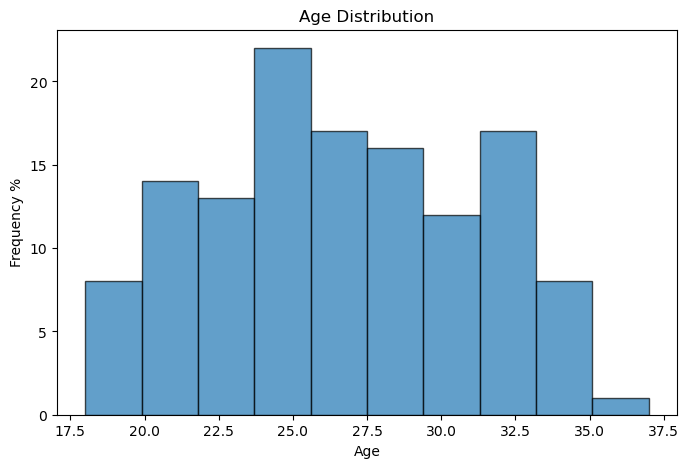

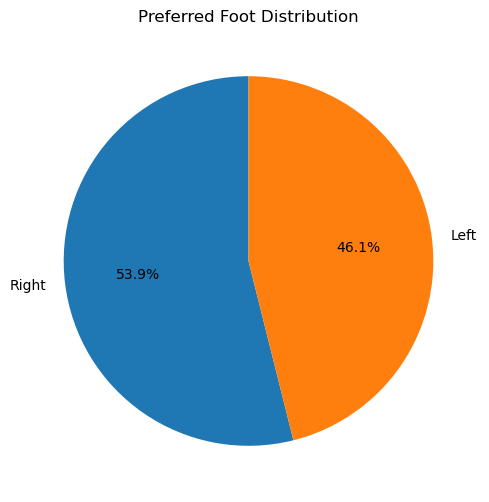

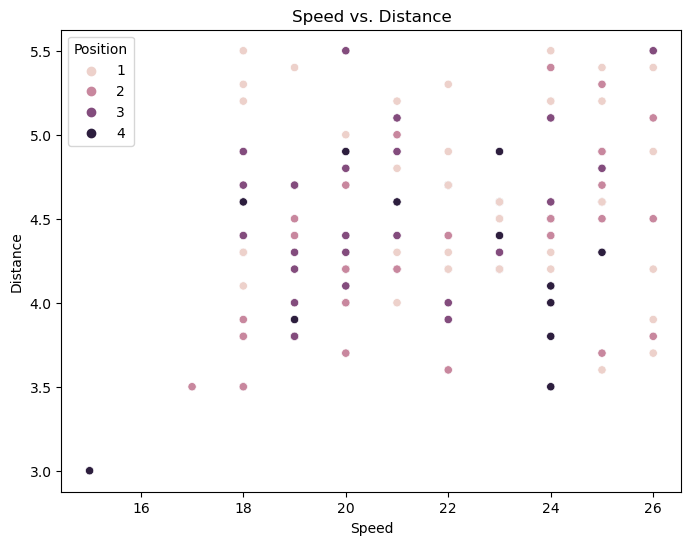

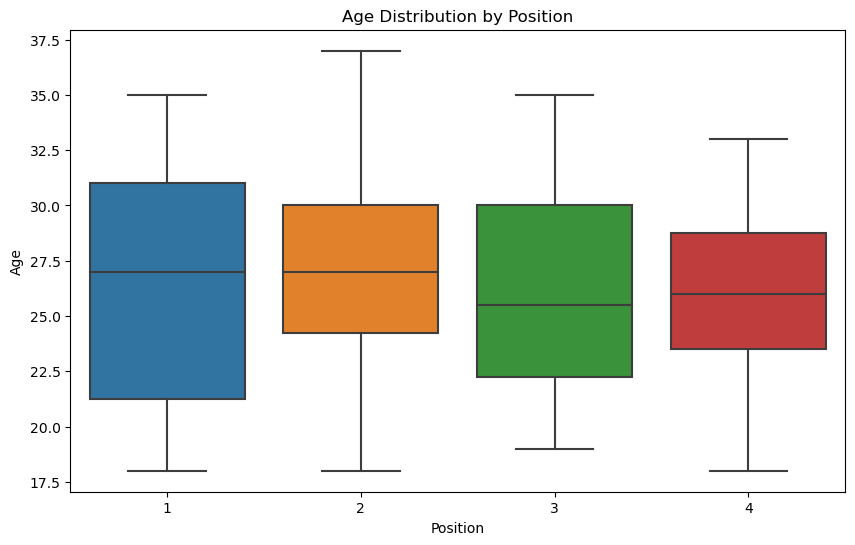

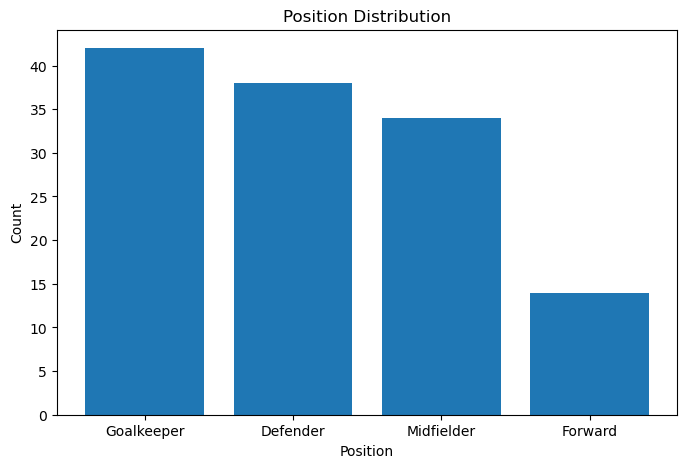

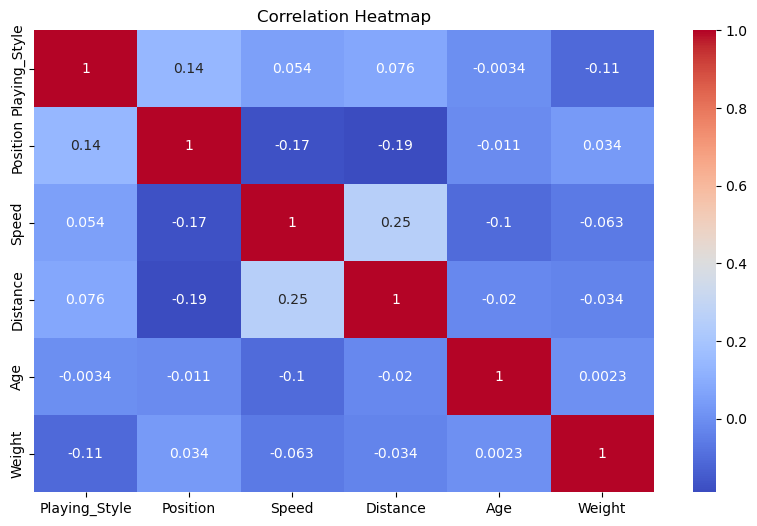

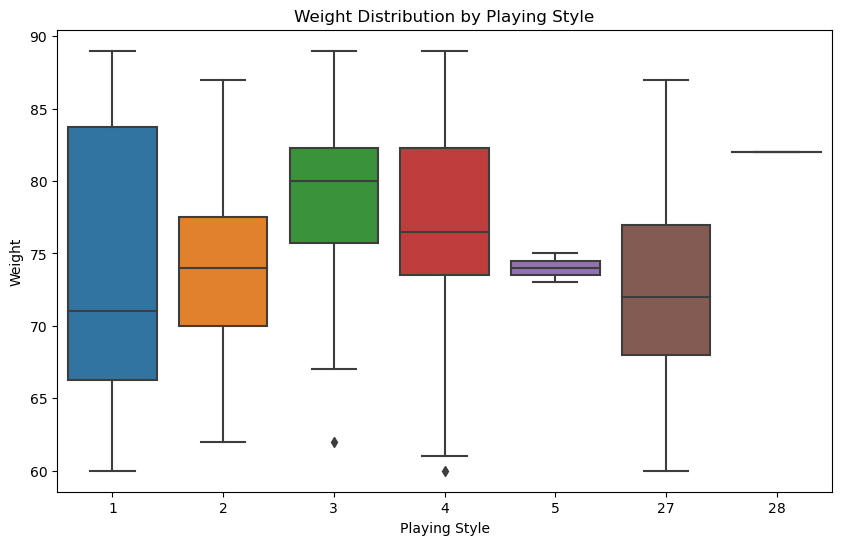

In [74]:
# Decoding player
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency %')
plt.show()

# Pie Chart for Preferred Foot
plt.figure(figsize=(6, 6))
preferred_foot_counts = df['Preferred_Foot'].value_counts()
plt.pie(preferred_foot_counts, labels=['Right', 'Left'], autopct='%1.1f%%', startangle=90)
plt.title('Preferred Foot Distribution')
plt.show()

# Scatter Plot for Speed vs. Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Speed', y='Distance', data=df, hue='Position')
plt.title('Speed vs. Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.show()

# Box Plot for Age by Position
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Age', data=df)
plt.title('Age Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.show()

# Bar Chart for Position Distribution
plt.figure(figsize=(8, 5))
position_counts = df['Position'].value_counts()
positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
plt.bar(positions, position_counts)
plt.title('Position Distribution')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

# Heatmap for Recommended Exercises
recommended_exercises = df['Recommended_Exercises'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Playing_Style', 'Position', 'Speed', 'Distance', 'Age', 'Weight']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Box Plot for Weight by Playing Style
plt.figure(figsize=(10, 6))
sns.boxplot(x='Playing_Style', y='Weight', data=df)
plt.title('Weight Distribution by Playing Style')
plt.xlabel('Playing Style')
plt.ylabel('Weight')
plt.show()


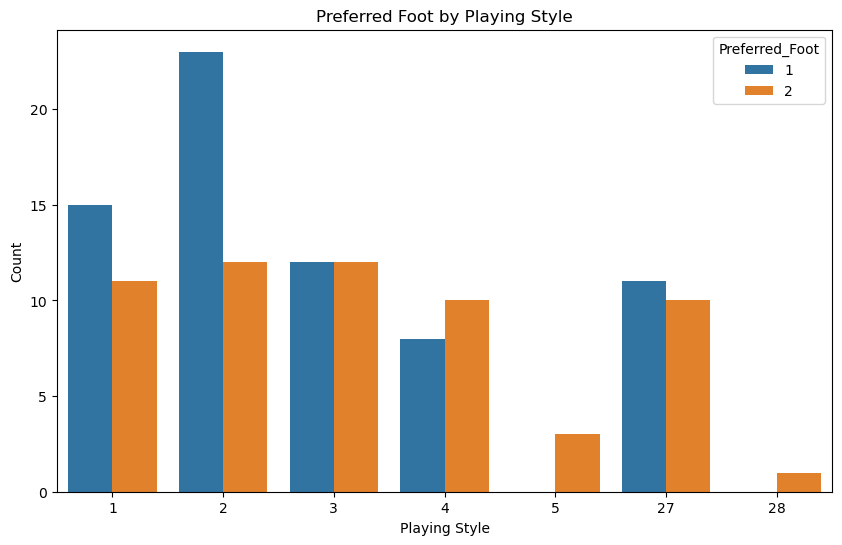

In [75]:
# Bar Chart for Preferred Foot by Playing Style
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Playing_Style', hue='Preferred_Foot')
plt.title('Preferred Foot by Playing Style')
plt.xlabel('Playing Style')
plt.ylabel('Count')
plt.show()


# The module Inputs

In [76]:
X = np.array([[p['Position'], p['Preferred_Foot'], p['Playing_Style'], p['Heart_Rate'], 
               p['Body_Temperature'], p['Speed'], p['Distance'], p['Height'], p['Age'], p['Weight']]
              for p in players])
y = np.array([[exercise for exercise in p['Recommended_Exercises']] for p in players])

/tmp/ipykernel_32/1469993.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array([[exercise for exercise in p['Recommended_Exercises']] for p in players])


# Confusion Matrix

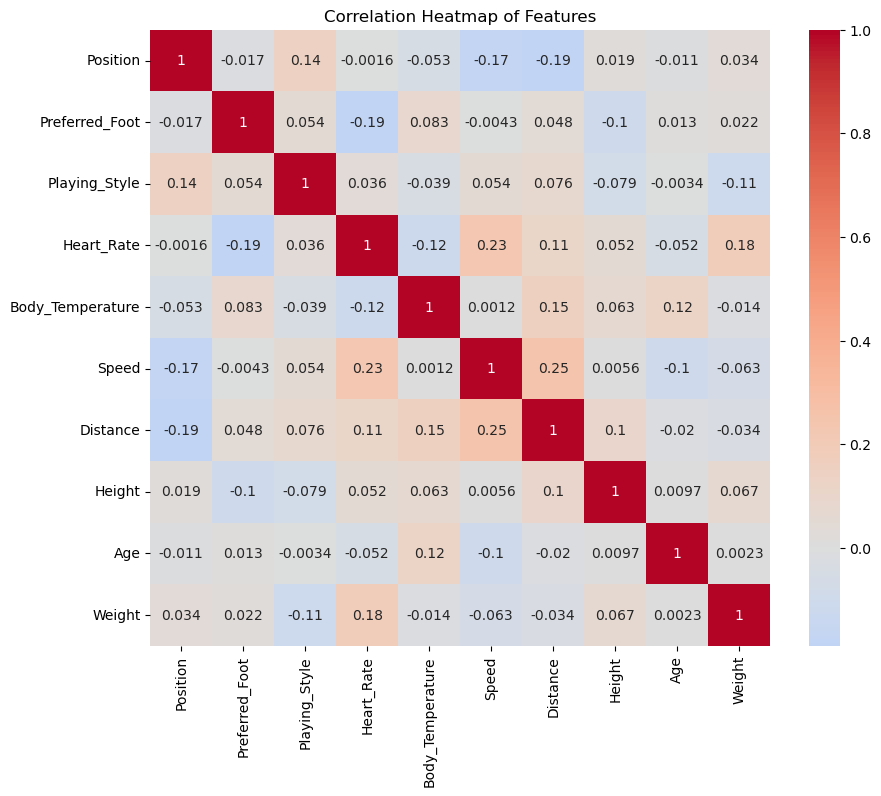

In [77]:
features = ['Position', 'Preferred_Foot', 'Playing_Style', 'Heart_Rate', 'Body_Temperature', 
            'Speed', 'Distance', 'Height', 'Age', 'Weight']

# Create a subset DataFrame with the selected features
subset_df = df[features]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

# Spliting the data to test and train

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Our Module

In [83]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.ensemble import RandomForestClassifier

mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)

# Create the RandomForestClassifier (you can replace this with your desired model)
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate Hamming Loss
hamming = hamming_loss(y_test, y_pred)
print("Hamming Loss:", hamming)

# Calculate Jaccard Similarity Score (micro-average)
jaccard = jaccard_score(y_test, y_pred, average='micro')
print("Jaccard Similarity Score (Micro-Average):", jaccard)

Hamming Loss: 0.0
Jaccard Similarity Score (Micro-Average): 1.0


# Testing Our Module

In [53]:
from sklearn.metrics import hamming_loss, jaccard_score, accuracy_score, precision_recall_fscore_support

# Assuming you have y_test and y_pred as provided in the previous example

# Calculate Hamming Loss and Jaccard Score
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='samples')  # You can use 'micro', 'macro', 'weighted', or 'samples'

# Calculate Subset Accuracy
subset_accuracy = accuracy_score(y_test, y_pred)

# Calculate Micro and Macro Precision, Recall, F1-score
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

print(f"Hamming Loss: {hamming:.4f}")
print(f"Jaccard Score: {jaccard:.4f}")
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Micro Precision: {micro_precision:.4f}, Micro Recall: {micro_recall:.4f}, Micro F1-score: {micro_f1:.4f}")
print(f"Macro Precision: {macro_precision:.4f}, Macro Recall: {macro_recall:.4f}, Macro F1-score: {macro_f1:.4f}")

Hamming Loss: 0.0368
Jaccard Score: 0.8953
Subset Accuracy: 0.4118
Micro Precision: 0.9598, Micro Recall: 0.9409, Micro F1-score: 0.9503
Macro Precision: 0.8530, Macro Recall: 0.8256, Macro F1-score: 0.8328


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


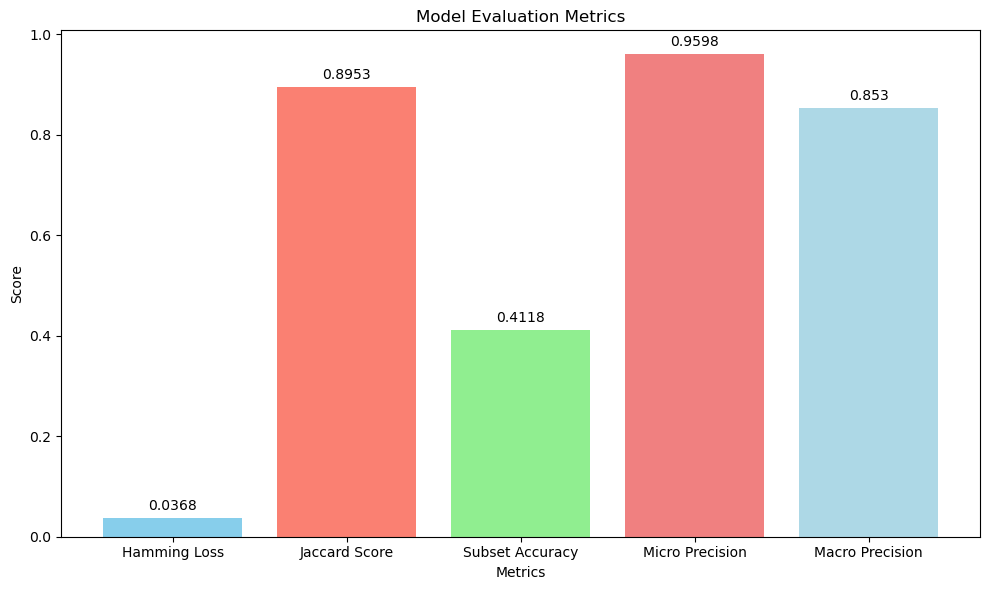

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Metric names and values
metrics = ['Hamming Loss', 'Jaccard Score', 'Subset Accuracy', 'Micro Precision', 'Macro Precision']
values = [0.0368, 0.8953, 0.4118, 0.9598, 0.8530]

# Create an array of positions for the bars
x = np.arange(len(metrics))

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, values, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightblue'])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Add metric values above the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')

# Customize x-axis labels
plt.xticks(x, metrics)

# Show the plot
plt.tight_layout()
plt.show()


# Testing Our module With New Data

In [54]:
# Example player data for prediction
example_player = {
        "Position": "Defender",
        "Preferred_Foot": "Right",
        "Playing_Style": "Physical",
        "Heart_Rate": 140,
        "Body_Temperature": 98.6,
        "Speed": 19,
        "Distance": 3.8,
        "Height": 186,
        "Age": 24,
        "Weight": 70
}

example_player["Position"] = position_encoding.get(example_player["Position"], example_player["Position"])
example_player["Preferred_Foot"] = foot_encoding.get(example_player["Preferred_Foot"], example_player["Preferred_Foot"])
example_player["Playing_Style"] = playing_style_encoding.get(example_player["Playing_Style"], example_player["Playing_Style"])
# Encode and standardize example player data
#example_data = np.array(example_player).reshape(1, -1)

example_data= np.array([example_player['Position'], example_player['Preferred_Foot'], example_player['Playing_Style'], example_player['Heart_Rate'], 
               example_player['Body_Temperature'], example_player['Speed'], example_player['Distance'], example_player['Height'], example_player['Age'], example_player['Weight']])

example_data = np.array(example_data).reshape(1, -1)

#module prediction
new_data_pred = model.predict(example_data)

# Transform the predicted labels back to original format
new_data_labels = mlb.inverse_transform(new_data_pred)

# Print the predicted labels for the new data
re=[]
for labels in new_data_labels:
    re.append(labels)
    print(labels)
#(8, 10, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 34, 35, 36, 37, 38)

(10, 13, 14, 15, 16, 17, 22, 27, 29, 30, 31)


In [55]:
exercise_decoding = {v: k for k, v in exercise_encoding.items()}
exercises_decoding = np.array(list(exercise_decoding.values()))

re=np.array(re)
for ee in re:
         ae=exercises_decoding[ee]
         print(ae)

['Agility Drills' 'Plyometric Exercises' 'Speed Ladder Drills'
 'Speed and Acceleration Training' 'Sprint Intervals' 'Cone Drills'
 'Heading Practice' 'Aerial Duel Practice' 'Youth Conditioning Drills'
 'Dynamic Stretching' 'Balancing Exercises']


# Task 2: Extract more info about player physiological state

# 1-Heart Rate and Body Temperature:

   Monitoring Fatigue and Recovery: Elevated heart rate and body temperature could indicate a high level of exertion and fatigue during training or a match. Monitoring these values over time can help coaches assess the player's recovery and make informed decisions about their workload.

#  2-Speed and Distance:
   Work Rate: Speed and distance covered during a match can indicate a player's work rate and contribution to both offensive and defensive phases of the game. Players covering larger distances might be more involved in various areas of the field.
   Intensity and Sprinting: Analyzing speed bursts or sprinting distances can highlight a player's explosive movements and ability to quickly change pace.

 #  3-Height, Age, and Weight:
   Position-specific Assessment: Different positions on the field require varying physical attributes. Analyzing these parameters alongside positional data can help coaches identify players who fit specific roles and playing styles.
   Age Consideration: Age can affect performance and recovery. Comparing a player's performance metrics to those of players in similar age groups can provide context for their performance level.

In [56]:

def recommend_exercises(player_data):
    position = player_data["Position"]
    recommended_exercises = role_exercises.get(position, [])

    # Adjust based on weight
    if player_data["Weight"] > 80:
        recommended_exercises.append("Strength Training")
        recommended_exercises.append("Functional Strength Workouts")
        recommended_exercises.append("Agility Drills with Resistance")
    else:
        recommended_exercises.append("Agility Drills")
        recommended_exercises.append("Plyometric Exercises")
        recommended_exercises.append("Speed Ladder Drills")

    # Adjust based on age
    if player_data["Age"] < 25:
        recommended_exercises.append("Youth Conditioning Drills")
        recommended_exercises.append("Dynamic Stretching")
        recommended_exercises.append("Balancing Exercises")

    # Adjust based on speed and distance
    if player_data["Speed"] > 18:
        recommended_exercises.append("Speed and Acceleration Training")
        recommended_exercises.append("Sprint Intervals")
        recommended_exercises.append("Cone Drills")

    if player_data["Distance"] > 4:
        recommended_exercises.append("Endurance Training")
        recommended_exercises.append("Interval Runs")
        recommended_exercises.append("Agility Circuit Training")

    # Adjust based on height
    if player_data["Height"] > 185:
        recommended_exercises.append("Aerial Duel Practice")
        recommended_exercises.append("Jumping Exercises")
        recommended_exercises.append("Heading Drills")

    return recommended_exercises
# Define the recommended exercises for each position

    
for player in players:
    role = player["Position"]
    recommended_exercisess = set(player.get("Recommended_Exercises", []))
    new_exercises = [exercise for exercise in recommend_exercises(player) if exercise not in recommended_exercisess]
    player.setdefault("Recommended_Exercises", []).extend(new_exercises)
# Print the updated player data


In [57]:
import random
from datetime import datetime, timedelta

# Generate synthetic data
num_days = 7  # Number of days to simulate
num_readings_per_day = 4  # Number of readings per day
start_date = datetime(2023, 8, 1)

data = []

import random
from datetime import datetime, timedelta

# Generate synthetic data during an activity
activity_duration = timedelta(minutes=90)
time_interval = timedelta(seconds=15)
start_time = datetime(2023, 8, 1, 9, 0)  # Start time of the activity

data = []

current_time = start_time
while current_time < start_time + activity_duration:
    heart_rate = random.randint(140, 180)  # Simulated heart rate range during activity
    body_temperature = round(random.uniform(98.5, 99.5), 1)  # Simulated body temperature range during activity
    data.append({
        "Time": current_time.time(),
        "Heart_Rate": heart_rate,
        "Body_Temperature": body_temperature
    })
    current_time += time_interval

# Create a DataFrame
data = pd.DataFrame(data)

data
# Save DataFrame to CSV
#df.to_csv("fatigue_recovery_data.csv", index=False)


,Time,Heart_Rate,Body_Temperature
0,09:00:00,154,98.8
1,09:00:15,169,99.2
2,09:00:30,153,99.0
3,09:00:45,157,98.6
4,09:01:00,144,98.5
...,...,...,...
355,10:28:45,155,98.7
356,10:29:00,163,98.9
357,10:29:15,148,99.1
358,10:29:30,162,98.8


In [58]:
# Calculate baseline heart rate and body temperature
baseline_heart_rate = data["Heart_Rate"].iloc[0]
baseline_body_temperature = data["Body_Temperature"].iloc[0]

# Calculate average heart rate and body temperature during the activity
average_heart_rate = data["Heart_Rate"].mean()
average_body_temperature = data["Body_Temperature"].mean()

# Calculate heart rate variability (HRV)
hrv = data["Heart_Rate"].std()

# Relative changes in heart rate and body temperature
relative_heart_rate_change = (average_heart_rate - baseline_heart_rate) / baseline_heart_rate * 100
relative_body_temperature_change = (average_body_temperature - baseline_body_temperature) / baseline_body_temperature * 100

# Print the results
print(f"Baseline Heart Rate: {baseline_heart_rate}")
print(f"Baseline Body Temperature: {baseline_body_temperature}")
print(f"Average Heart Rate: {average_heart_rate}")
print(f"Average Body Temperature: {average_body_temperature}")
print(f"Heart Rate Variability (HRV): {hrv}")
print(f"Relative Heart Rate Change (%): {relative_heart_rate_change:.2f}%")
print(f"Relative Body Temperature Change (%): {relative_body_temperature_change:.2f}%")


Baseline Heart Rate: 154
Baseline Body Temperature: 98.8
Average Heart Rate: 160.65833333333333
Average Body Temperature: 98.98999999999998
Heart Rate Variability (HRV): 11.756936552651124
Relative Heart Rate Change (%): 4.32%
Relative Body Temperature Change (%): 0.19%


In [59]:
# Generate synthetic data
np.random.seed(42)  # For reproducibility

num_samples = 1000

heart_rate = np.random.randint(120, 180, num_samples)
body_temperature = np.random.uniform(98.0, 99.0, num_samples)
distance = np.random.uniform(2.0, 10.0, num_samples)
duration = np.random.uniform(60, 180, num_samples)
fatigue_level = 0.5 * heart_rate + 0.3 * body_temperature + 0.1 * distance + 0.2 * duration + np.random.normal(0, 5, num_samples)

# Create a DataFrame
data = pd.DataFrame({
    "Heart_Rate": heart_rate,
    "Body_Temperature": body_temperature,
    "Distance": distance,
    "Duration": duration,
    "Fatigue_Level": fatigue_level
})
data

,Heart_Rate,Body_Temperature,Distance,Duration,Fatigue_Level
0,158,98.046896,5.396219,107.892023,134.787441
1,171,98.268672,2.696312,146.777938,152.108677
2,148,98.022185,8.525989,93.640135,122.606798
3,134,98.498165,4.988077,142.488764,119.459029
4,162,98.476211,6.211994,62.939814,120.224255
...,...,...,...,...,...
995,123,98.184585,8.575413,177.044793,125.013849
996,120,98.295278,8.473465,80.413850,103.308061
997,168,98.793407,9.075394,167.788568,145.334836
998,159,98.185228,7.600274,153.216400,144.866632


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data (assuming you have a CSV file named "fatigue_data.csv")


# Define features (X) and target variable (y)
features = ["Heart_Rate", "Body_Temperature", "Distance", "Duration"]
X = data[features]
y = data["Fatigue_Level"]  # Assuming you have a column "Fatigue_Level" in your dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (linear regression in this case)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 21.901588695451164
R-squared: 0.8477713037635562


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data (assuming you have a CSV file named "fatigue_data.csv")

# Define features (X) and target variable (y)
features = ["Heart_Rate", "Body_Temperature", "Distance", "Duration"]
X = data[features]
y = data["Fatigue_Level"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features
degree = 1 # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the model (polynomial regression)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 21.901588695451206
R-squared: 0.8477713037635559
